Importing the Dependencies

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Collection and Processing

In [59]:
car_dataset = pd.read_csv('/content/car data.csv')

In [60]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,brio,2016,4.5,5.9,500000,Petrol,Dealer,Manual,0
1,city,2017,10.0,12.5,213000,Diesel,Dealer,Manual,0
2,city,2009,3.0,11.0,197176,Petrol,Dealer,Manual,0
3,brio,2015,4.0,5.9,142000,Petrol,Dealer,Manual,0
4,city,2016,8.0,11.6,135154,Diesel,Dealer,Manual,0


In [61]:
car_dataset.shape

(301, 9)

In [62]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [63]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [64]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [65]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [66]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,brio,2016,4.5,5.9,500000,0,0,0,0
1,city,2017,10.0,12.5,213000,1,0,0,0
2,city,2009,3.0,11.0,197176,0,0,0,0
3,brio,2015,4.0,5.9,142000,0,0,0,0
4,city,2016,8.0,11.6,135154,1,0,0,0


In [67]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [69]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2016           5.90      500000          0            0             0   
1    2017          12.50      213000          1            0             0   
2    2009          11.00      197176          0            0             0   
3    2015           5.90      142000          0            0             0   
4    2016          11.60      135154          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2018           9.83        1300          1            0             0   
297  2011           4.15        1200          0            0             0   
298  2017           9.85        1000          0            0             0   
299  2014           5.59         500          0            0             0   
300  2013           9.54         500          1            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [70]:
print(Y)

0       4.50
1      10.00
2       3.00
3       4.00
4       8.00
       ...  
296     9.25
297     2.85
298     7.25
299     3.35
300     4.75
Name: Selling_Price, Length: 301, dtype: float64


splitting the data

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1, random_state=2)

Linear Regression

In [72]:
lin_reg_model = LinearRegression()

In [73]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Evaluation

In [74]:
training_data_prediction = lin_reg_model.predict(X_train)

In [75]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8917574416454216


Visualize the actual prices and Predicted prices

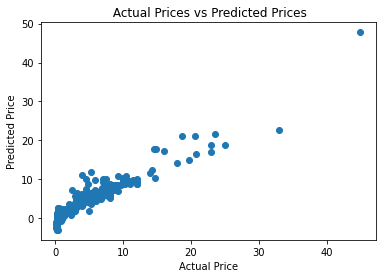

In [76]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [77]:
test_data_prediction = lin_reg_model.predict(X_test)

In [78]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7976307308304709


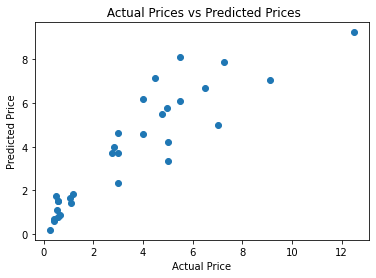

In [79]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()